In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

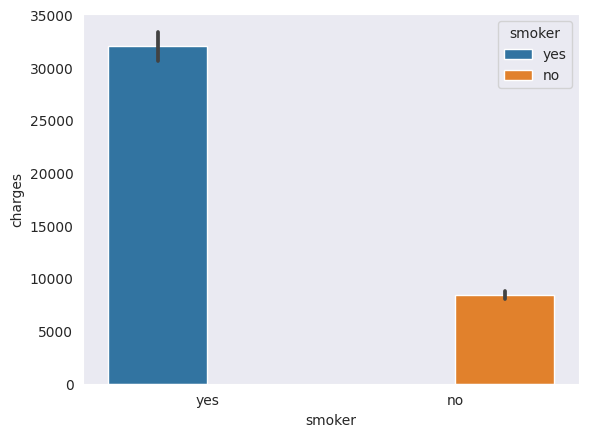

In [8]:
sns.set_style("dark")
sns.barplot(x = df["smoker"] , y = df['charges'],hue=df['smoker']);

In [9]:
df[df['smoker']=='yes']['charges'].mean()

32050.23183153284

In [10]:
df[df['smoker']=='no']['charges'].mean()

8434.268297856204

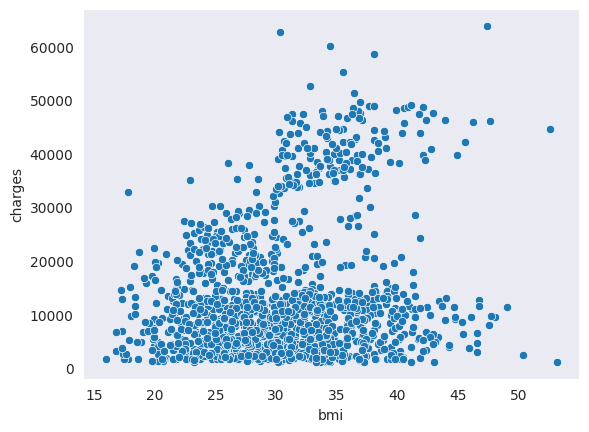

In [11]:
sns.set_style("dark")
sns.scatterplot(x = df["bmi"] , y = df['charges']);

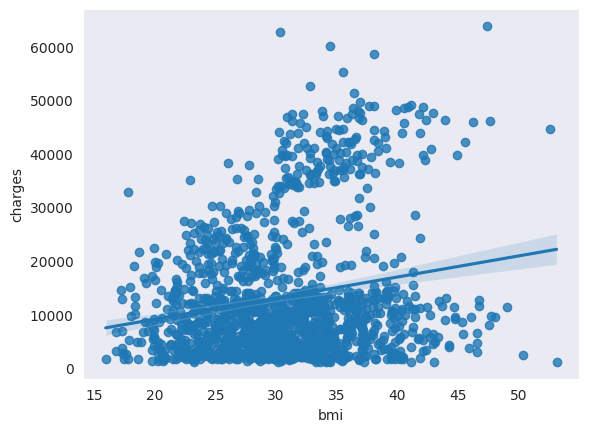

In [12]:
sns.set_style("dark")
sns.regplot(x = df["bmi"] , y = df['charges']);

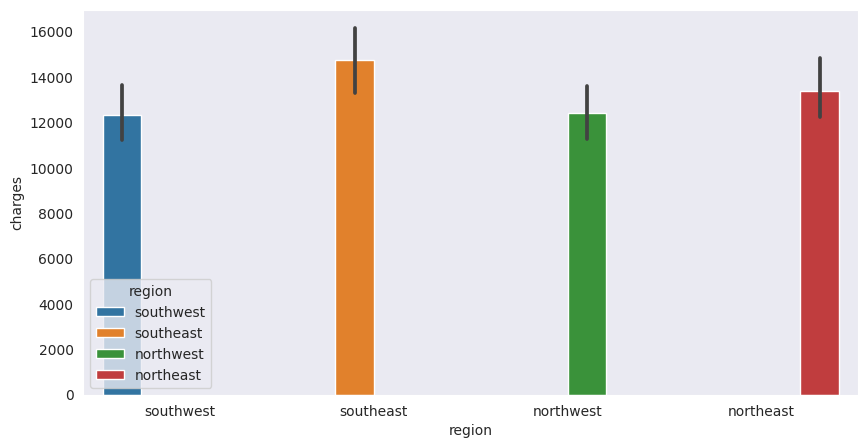

In [13]:
sns.set_style("dark")
plt.figure(figsize=[10,5])
sns.barplot(x = df["region"] , y = df['charges'],hue=df['region']);

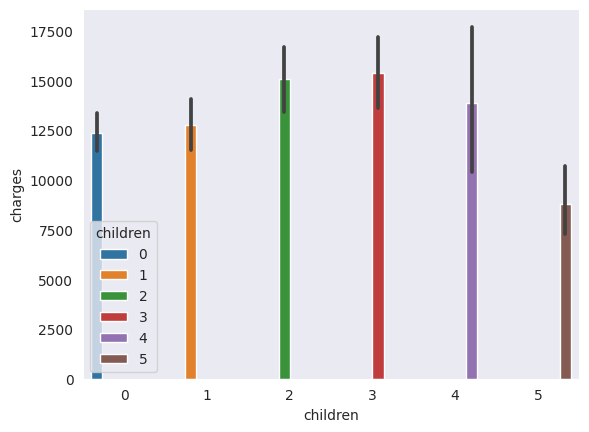

In [14]:
sns.set_style("dark")
sns.barplot(x = df["children"] , y = df['charges'],hue=df['children']);

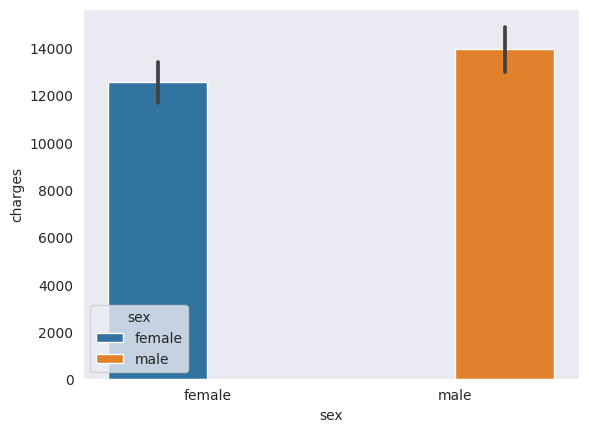

In [15]:
sns.set_style("dark")
sns.barplot(x = df["sex"] , y = df['charges'],hue=df['sex']);

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])
df['sex'] = encoder.fit_transform(df['sex'])

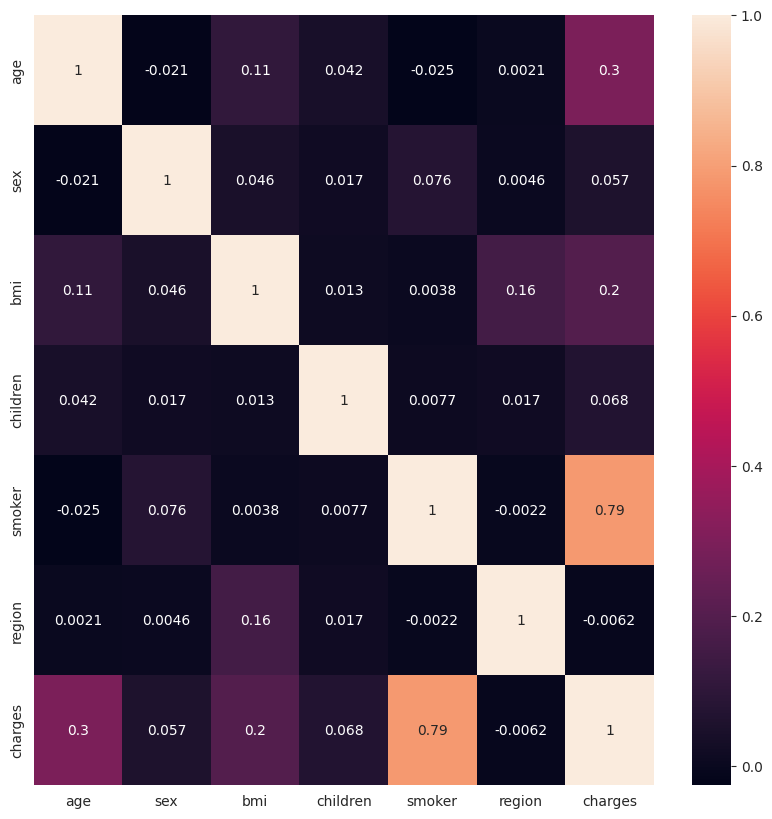

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True)

In [18]:
df2 = df.drop(['region','sex','children'],axis=1)

In [19]:
df2.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [20]:
X = df2.drop(['charges'],axis=1)
y = df2['charges']

In [21]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [23]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

In [25]:
model = LinearRegression()

model.fit(X_train,y_train)

print('Test score', model.score(X_test, y_test))

Test score 0.7945500805653087


In [26]:
from xgboost import XGBRegressor
model_xgbre = XGBRegressor(learning_rate = 0.05 , max_depth = 3)

model_xgbre.fit(X_train,y_train)

print('Test score', model_xgbre.score(X_test, y_test))

Test score 0.8995553316729098
